In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data

In [9]:
# Split the data into training and test 
(X_train, Y_train), (X_test,Y_test) = load_data()

In [10]:
print(X_train.shape)

(50000, 32, 32, 3)


(32, 32, 3)


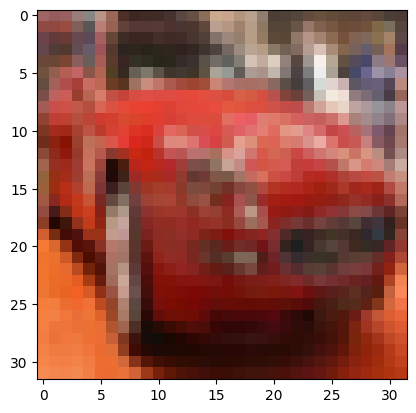

In [14]:
plt.imshow(X_train[5])
print(X_train[0].shape)

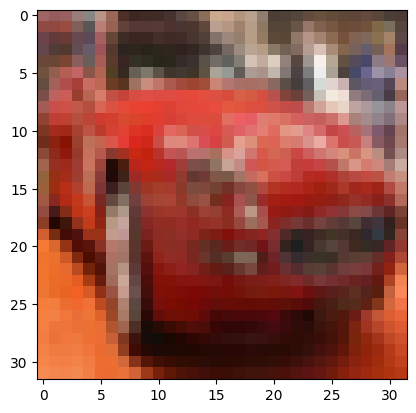

In [15]:
# Rescale Images
X_train_scaled = X_train/255
X_test_scaled = X_test/255
plt.imshow(X_train[5])

In [21]:
model = Sequential([
    Conv2D(32, (3,3), input_shape = (32,32,3), padding = "same", activation ="relu", kernel_constraint =MaxNorm(3)),
    Dropout(0.3),
    Conv2D(32, (3,3), padding = "same", activation ="relu", kernel_constraint =MaxNorm(3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'sigmoid')    
])

In [22]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "sparse_categorical_accuracy")

In [23]:
model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs = 25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5326 - sparse_categorical_accuracy: 0.4455 - val_loss: 1.2106 - val_sparse_categorical_accuracy: 0.5792
Epoch 2/25
1563/1563 [==============================] - 140s 90ms/step - loss: 1.1891 - sparse_categorical_accuracy: 0.5750 - val_loss: 1.0316 - val_sparse_categorical_accuracy: 0.6375
Epoch 3/25
1563/1563 [==============================] - 173s 111ms/step - loss: 1.0220 - sparse_categorical_accuracy: 0.6408 - val_loss: 0.9752 - val_sparse_categorical_accuracy: 0.6565
Epoch 4/25
1563/1563 [==============================] - 156s 100ms/step - loss: 0.9069 - sparse_categorical_accuracy: 0.6789 - val_loss: 0.9643 - val_sparse_categorical_accuracy: 0.6592
Epoch 5/25
1563/1563 [==============================] - 154s 98ms/step - loss: 0.8148 - sparse_categorical_accuracy: 0.7127 - val_loss: 0.9188 - val_sparse_categorical_accuracy: 0.6773
Epoch 6/25
1563/1563 [==============================] - 163s 105ms/step -

In [24]:
#Check for the accuracy
score = model.evaluate(X_test, Y_test, verbose = 0)
print("Loss : ",score[0])
print("Accuracy: {} % ".format(score[1]*100) )

Loss :  398.0255126953125
Accuracy: 52.490001916885376 % 


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [26]:
Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3))

In [27]:

print(model.layers[0].kernel)

<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 9.01899561e-02,  9.37150568e-02, -9.81980711e-02,
           1.77311793e-01,  3.38291645e-01, -1.43231064e-01,
           2.13527158e-02, -5.48252091e-02,  2.31633782e-01,
          -4.95746322e-02,  2.51318254e-02, -2.76767969e-01,
           2.25499988e-01, -2.33537421e-01,  9.02772024e-02,
           7.99331889e-02, -1.03462453e-03, -1.40892744e-01,
           1.93347901e-01, -1.30876601e-01, -2.25232206e-02,
          -1.61730781e-01,  1.79848373e-01,  6.40506074e-02,
           4.24799286e-02,  1.49605229e-01,  7.26167411e-02,
          -1.77680358e-01, -1.99125960e-01,  4.27332334e-02,
          -1.74869671e-02,  3.44049633e-01],
         [ 1.03852518e-01,  9.64297652e-02, -1.69960499e-01,
          -2.31947079e-01,  3.58025670e-01, -2.67726302e-01,
           1.58321366e-01,  1.05512500e-01,  4.99402098e-02,
          -2.79047012e-01, -2.68684998e-02, -1.45885035e-01,
           3.48054096e-02,

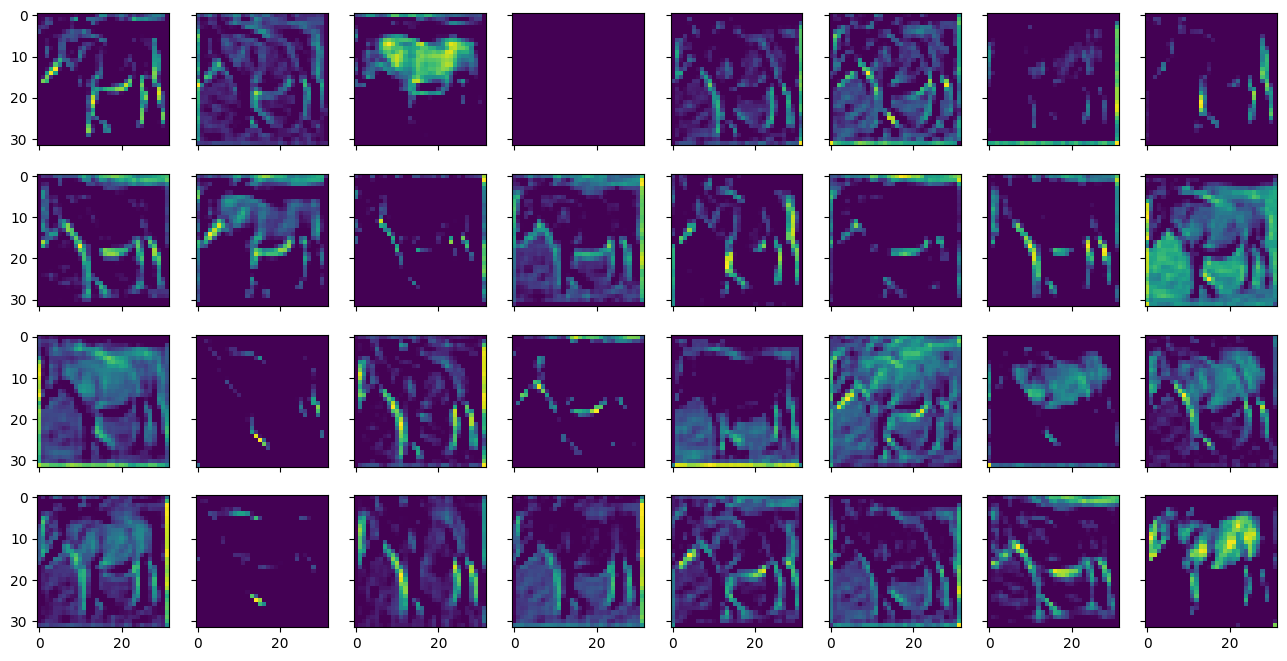

In [28]:
# Extract output from each layer
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))
 
# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
 
plt.show()

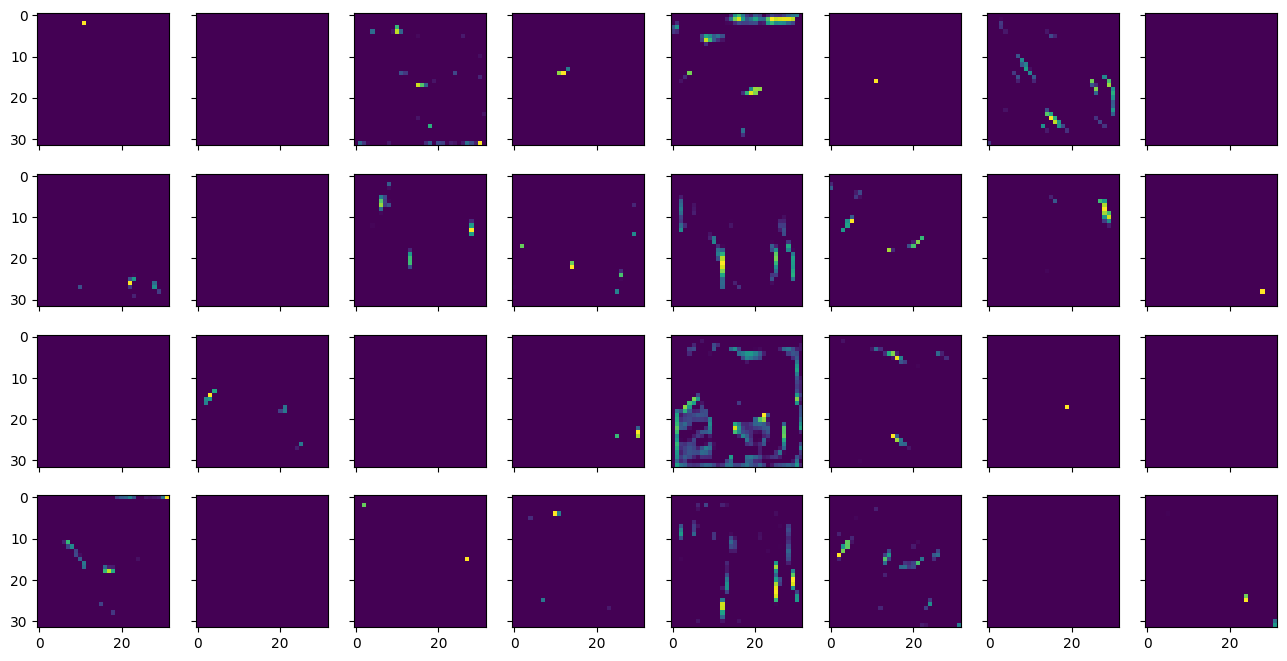

In [29]:
# Show the 32 feature maps from the third layer
l2_features = features[2].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l2_features[..., i])
 
plt.show()